##### Next update of this network contains:
- normal costs
- normal width
- all edges connected
- proper nodes at one-way bridges
- node_id; have been added
- edge_id ; have been added

In [1]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Show with attributes 
graph = gpd.read_file('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp')
print(graph.iloc[3]['cost'])
print(graph.head()) # see what attrinutes the edges and nodes from the shapefile contain

516.143132510851
   edge_id  start_node  end_node  next_left_  abs_next_l  next_right  \
0       45          63        64          50          50          45   
1       54          78        56         -54          54         -39   
2       39          55        78         -55          55          39   
3        6          11        12        -101         101          43   
4      110         121        60         -41          41         110   

   abs_next_r  left_face  right_face        cost  \
0          45          0           0  122.826431   
1          39          0           0  250.869815   
2          39          0           0   43.350826   
3          43          4           5  516.143133   
4         110          0           0  584.250999   

                                            geometry  
0  LINESTRING (4.8703865 52.364651, 4.8716933 52....  
1  LINESTRING (4.9264105 52.3695602, 4.9289823 52...  
2  LINESTRING (4.9259642 52.3692824, 4.9264105 52...  
3  LINESTRING (4.

See if dijkstra works on this network

In [196]:
G=nx.read_shp('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp', simplify=True) # use simplify is true otherwise chart get shifted
w_G = nx.Graph()
lat_lon_to_index = {}
for i, node in enumerate(G.nodes()): #adds nodes with label 1 till n nodes to the network. 
    w_G.add_node(i, lat_lon= node)
    lat_lon_to_index[node] = i

for edge in G.edges(data=True): # adds edges with attributes to the graph from shapefile according to the order in which the edges are ordered in the shapefile
    w_G.add_edge(lat_lon_to_index[edge[0]], lat_lon_to_index[edge[1]], distance=edge[2]['cost'],id=edge[2]['edge_id'] )
c =list(w_G.nodes(data = True))
j = list(w_G.edges(data = True))

print(c[1])
print(j[1])


(1, {'lat_lon': (4.8719547, 52.3651758)})
(1, 20, {'distance': 50.5301293256479, 'id': 50})


In [197]:
h_G = nx.to_undirected(w_G)

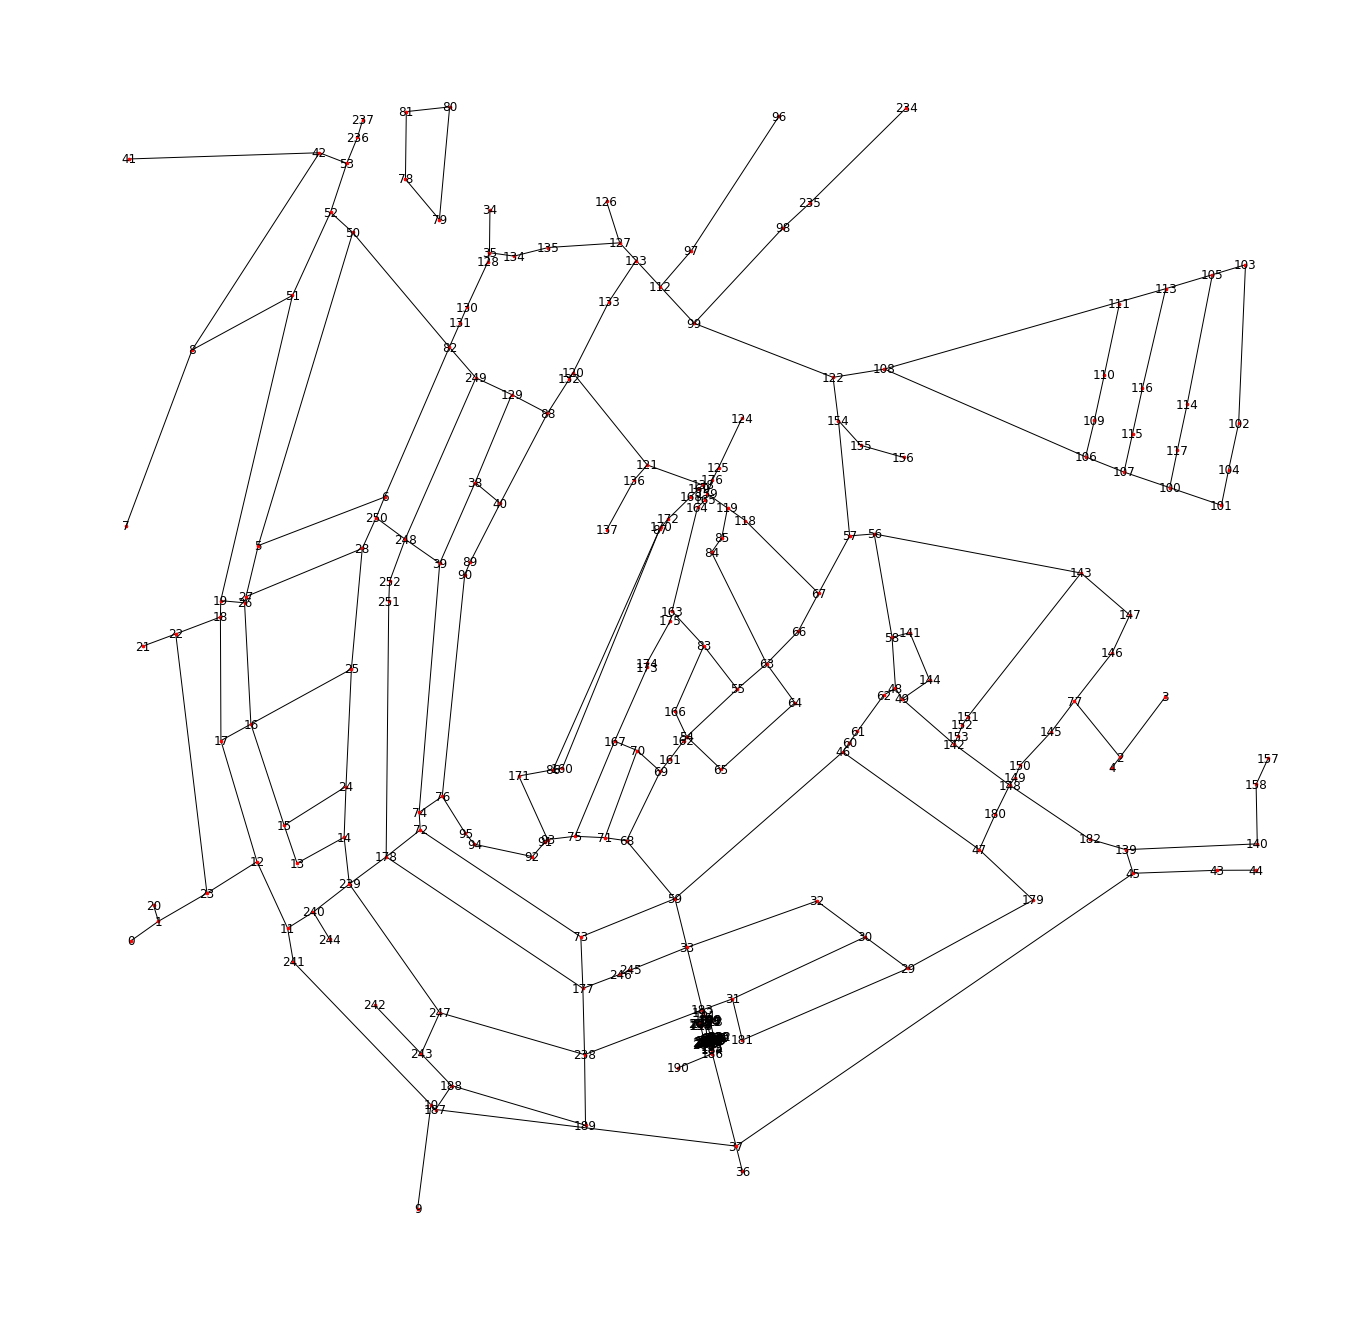

In [200]:
plt.figure(figsize=(18,18))
nx.draw(h_G, nx.get_node_attributes(h_G, 'lat_lon'), with_labels=True, node_size=7, font_size = 12)

In [199]:
print(nx.dijkstra_path(h_G, 9, 36, weight = 'distance'))

[9, 10, 187, 37, 36]


In [202]:
h_G.nodes[189]

{'lat_lon': (4.8961428, 52.3597257)}

In [213]:
h_G.nodes[189]['lat_lon'] = (4.8961428, 52.3599260)

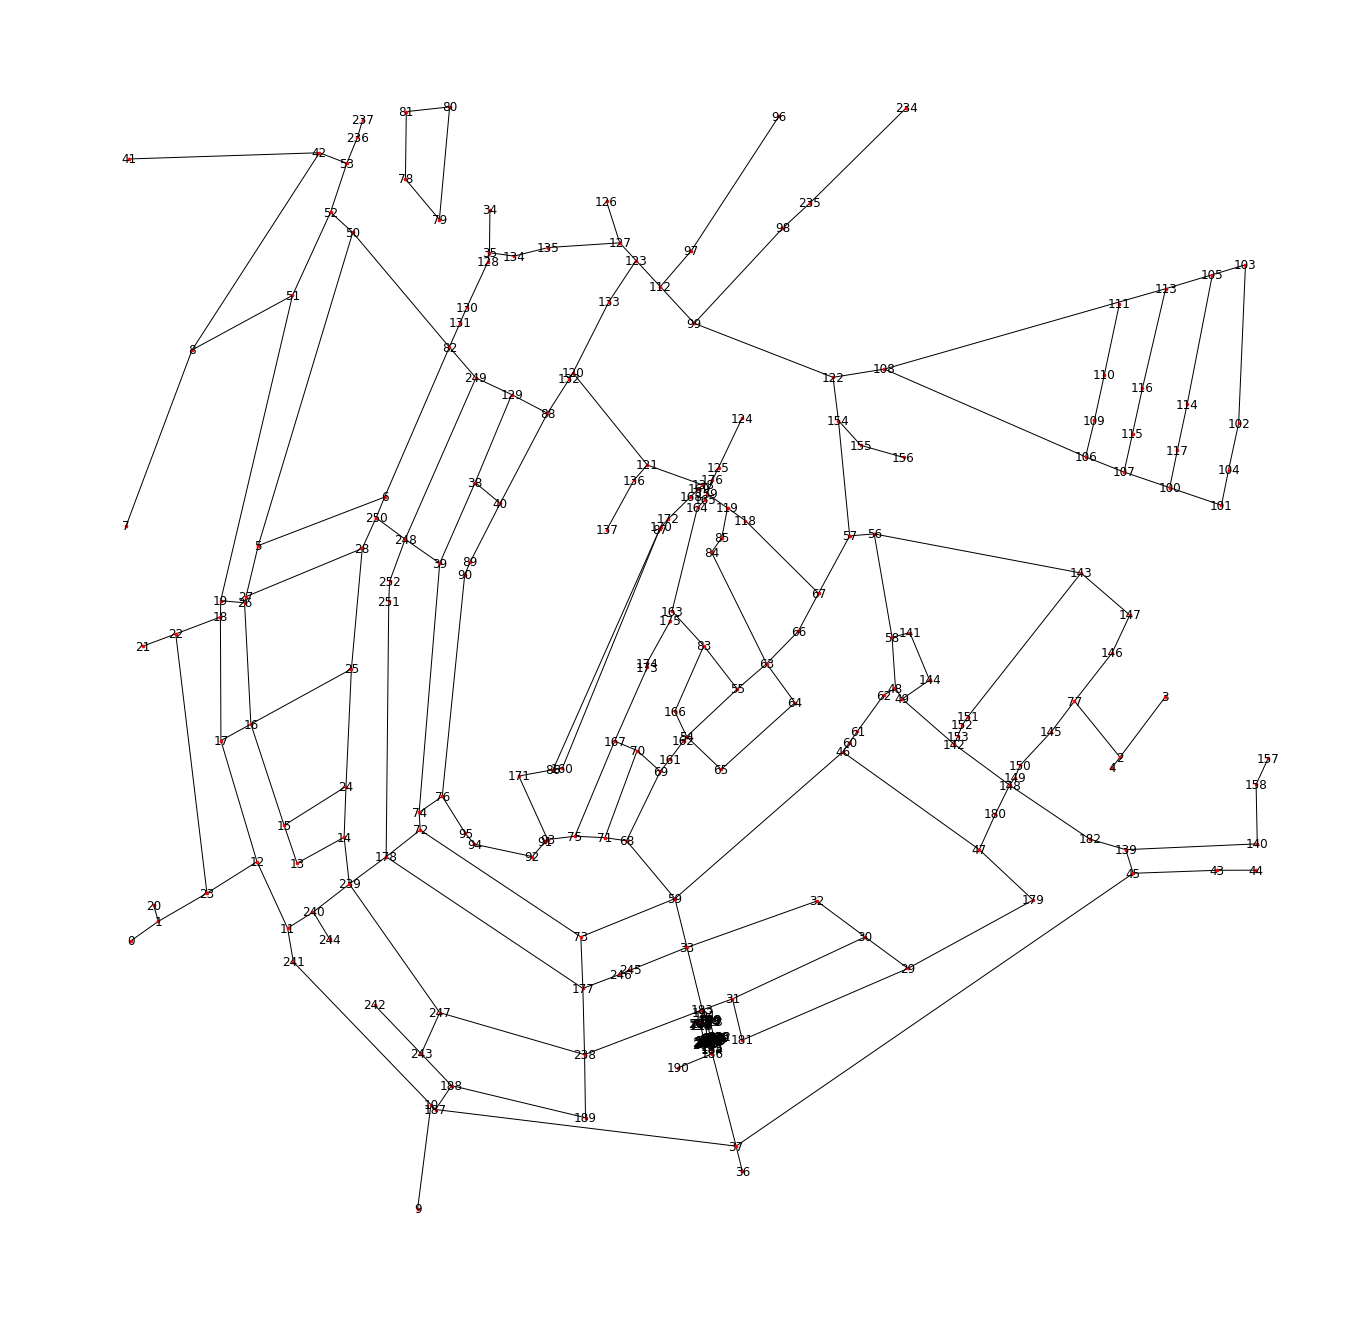

In [219]:
plt.figure(figsize=(18,18))
nx.draw(h_G, nx.get_node_attributes(h_G, 'lat_lon'), with_labels=True, node_size=7, font_size = 12)
plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals1.pdf', format='pdf', rasterized=False)
plt.show()